# Proyecto machine learning con el dataset IRIS
## Ivrvin Andres Torres Enriquez

## Carga y procesamiento de los  datos

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de los dataset de Iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Matriz de correlacion

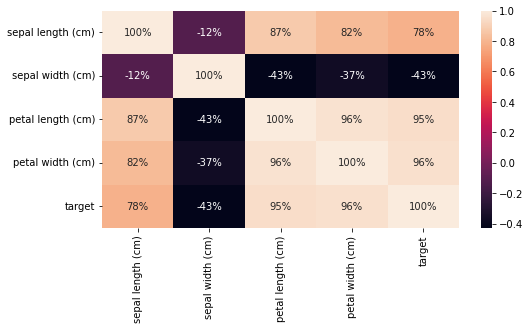

In [20]:
plt.figure(figsize=(8,4)) 
sns.heatmap(iris_df.corr(),annot=True,fmt=".0%") 
plt.show()

## Particion de los datos en 80/20 

In [13]:
from sklearn.model_selection import train_test_split

# particion de los datos de prueba y entrenamiento en 80/20
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los datos
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Pipeline de clasificacion
## Se va a utilizar el metodo de Logistic regression

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

## Evaluar el modelo
### vermos su  accuracy, recall y precision, F1 score, confusion matrix y reporte de clasificación 

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predecir sobre los datos de prueba
y_pred = pipeline.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Imprimir un informe de clasificación detallado
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusion")
print(conf_matrix)

Precisión del modelo: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Matriz de confusion
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## GRID SEARCH

In [40]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__max_iter': [100, 200, 300]
}

# Crear el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Imprimir los parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

Mejores parámetros encontrados: {'logreg__C': 1, 'logreg__max_iter': 100, 'logreg__solver': 'lbfgs'}


## Guardar los parametros en un archivo SAV

In [43]:

import joblib

joblib.dump(grid_search.best_estimator_, 'IRISpipeline.sav')

['IRISpipeline.sav']

## Usar el modelo para predicciones

In [48]:
loaded_model = joblib.load('IRISpipeline.sav')

# Realizar una predicción con nuevos datos (ejemplo)
nuevos_datos = [[5.1, 3.5, 1.4, 0.2]]  # Características de una nueva flor
prediccion = loaded_model.predict(nuevos_datos)
print(f"Clase predicha: {iris.target_names[prediccion[0]]}")

Clase predicha: setosa
